## Overview


In [2]:
import pandas as pd
import numpy as np
import numpy as np
import scipy as sp
from scipy import stats
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [3]:
df= pd.read_csv('covid_19_india.csv')
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
14289,14290,2021-04-27,8:00 AM,Telengana,-,-,340590,2094,411905
14290,14291,2021-04-27,8:00 AM,Tripura,-,-,33514,394,34738
14291,14292,2021-04-27,8:00 AM,Uttarakhand,-,-,115615,2213,156859
14292,14293,2021-04-27,8:00 AM,Uttar Pradesh,-,-,804563,11414,1120176


In [4]:
df.info

<bound method DataFrame.info of          Sno        Date     Time State/UnionTerritory  \
0          1  2020-01-30  6:00 PM               Kerala   
1          2  2020-01-31  6:00 PM               Kerala   
2          3  2020-02-01  6:00 PM               Kerala   
3          4  2020-02-02  6:00 PM               Kerala   
4          5  2020-02-03  6:00 PM               Kerala   
...      ...         ...      ...                  ...   
14289  14290  2021-04-27  8:00 AM            Telengana   
14290  14291  2021-04-27  8:00 AM              Tripura   
14291  14292  2021-04-27  8:00 AM          Uttarakhand   
14292  14293  2021-04-27  8:00 AM        Uttar Pradesh   
14293  14294  2021-04-27  8:00 AM          West Bengal   

      ConfirmedIndianNational ConfirmedForeignNational   Cured  Deaths  \
0                           1                        0       0       0   
1                           1                        0       0       0   
2                           2                    

In [5]:
df.shape

(14294, 9)

In [6]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,14294.000000,1.429400e+04,14294.000000,1.429400e+04
mean,7147.500000,1.564357e+05,2501.211068,1.712574e+05
std,4126.466709,3.162168e+05,6670.773475,3.465478e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3574.250000,1.294750e+03,10.000000,2.420750e+03
50%,7147.500000,1.678500e+04,327.000000,2.149200e+04
75%,10720.750000,1.831488e+05,1921.000000,2.097192e+05
max,14294.000000,3.601796e+06,65284.000000,4.343727e+06


In [7]:
df.describe(include='object')

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational
count,14294,14294,14294,14294,14294
unique,454,7,39,62,12
top,2020-06-11,8:00 AM,Kerala,-,-
freq,37,12656,454,13848,13848


In [8]:
df.drop('Sno', axis=1, inplace=True)

In [9]:
df.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [10]:
df.isna().sum()

Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [11]:
df['Year']=pd.DatetimeIndex(df['Date']).year
df['Month']=pd.DatetimeIndex(df['Date']).month
df['Day']=pd.DatetimeIndex(df['Date']).day

In [12]:
df.drop('Date', axis=1, inplace=True)

In [13]:
df.head()

,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Year,Month,Day
0,6:00 PM,Kerala,1,0,0,0,1,2020,1,30
1,6:00 PM,Kerala,1,0,0,0,1,2020,1,31
2,6:00 PM,Kerala,2,0,0,0,2,2020,2,1
3,6:00 PM,Kerala,3,0,0,0,3,2020,2,2
4,6:00 PM,Kerala,3,0,0,0,3,2020,2,3


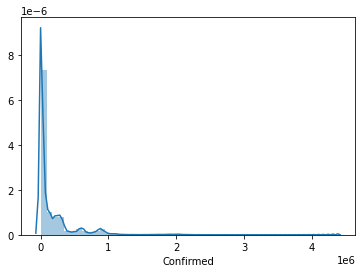

In [14]:
sns.distplot(df['Confirmed'], hist=True)

##### The above plot is right skewed so we need to convert it into Gaussian Distribution or Normal Distribution with the help of Log transformation

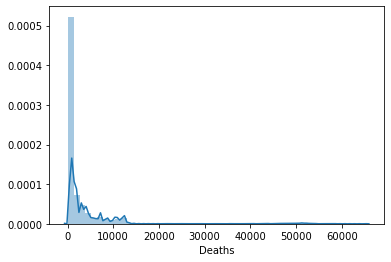

In [15]:
sns.distplot(df['Deaths'], hist=True)

##### The above plot is right skewed so we need to convert it into Gaussian Distribution or Normal Distribution with the help of Log transformation

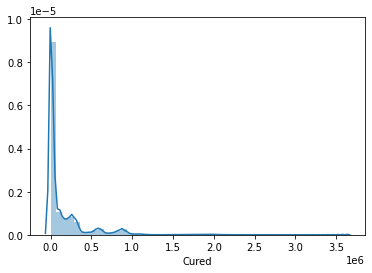

In [16]:
sns.distplot(df['Cured'], hist=True)

##### The above plot is right skewed so we need to convert it into Gaussian Distribution or Normal Distribution with the help of Log transformation

In [17]:
df.skew()

Cured        3.875942
Deaths       5.699206
Confirmed    4.255699
Year         0.900878
Month        0.179441
Day         -0.010408
dtype: float64

In [18]:
df['Deaths']=np.log(df['Deaths']+1)

In [19]:
df['Deaths']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
14289    7.647309
14290    5.978886
14291    7.702556
14292    9.342684
14293    9.306559
Name: Deaths, Length: 14294, dtype: float64

In [20]:
df['Deaths'].skew()

-0.30708792189811596

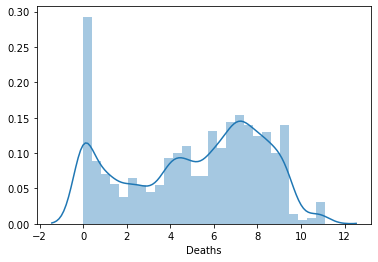

In [21]:
sns.distplot(df['Deaths'], hist=True)

In [22]:
df_confirmed=np.log(df['Confirmed']+1)

In [23]:
df_confirmed

0         0.693147
1         0.693147
2         1.098612
3         1.386294
4         1.386294
           ...    
14289    12.928550
14290    10.455618
14291    11.963109
14292    13.928997
14293    13.540999
Name: Confirmed, Length: 14294, dtype: float64

In [24]:
df_confirmed.skew()

-0.8437610117028567

In [25]:
df.skew()

Cured        3.875942
Deaths      -0.307088
Confirmed    4.255699
Year         0.900878
Month        0.179441
Day         -0.010408
dtype: float64

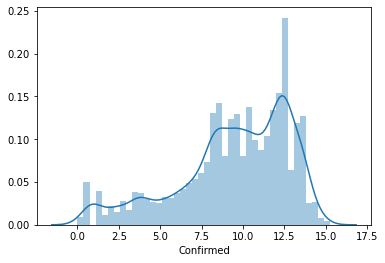

In [26]:
sns.distplot(df_confirmed, hist=True)

In [27]:
#using IQR to detect outlier(s)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_outlier=((df < (Q1 - (1.5 * IQR)))|(df > (Q3 + (1.5 * IQR))))
df_outlier

,Confirmed,ConfirmedForeignNational,ConfirmedIndianNational,Cured,Day,Deaths,Month,State/UnionTerritory,Time,Year
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14289,False,False,False,False,False,False,False,False,False,False
14290,False,False,False,False,False,False,False,False,False,False
14291,False,False,False,False,False,False,False,False,False,False
14292,True,False,False,True,False,False,False,False,False,False


In [28]:
df_outlier.sum()

Confirmed                   1554
ConfirmedForeignNational       0
ConfirmedIndianNational        0
Cured                       1560
Day                            0
Deaths                         0
Month                          0
State/UnionTerritory           0
Time                           0
Year                           0
dtype: int64

In [29]:
df.drop(['Time','ConfirmedForeignNational','ConfirmedIndianNational', 'Confirmed'], axis=1, inplace=True)

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['State/UnionTerritory'] = le.fit_transform(df['State/UnionTerritory'])

In [31]:
df.head()

,State/UnionTerritory,Cured,Deaths,Year,Month,Day
0,18,0,0.0,2020,1,30
1,18,0,0.0,2020,1,31
2,18,0,0.0,2020,2,1
3,18,0,0.0,2020,2,2
4,18,0,0.0,2020,2,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D20B90DD90>,
      dtype=object)

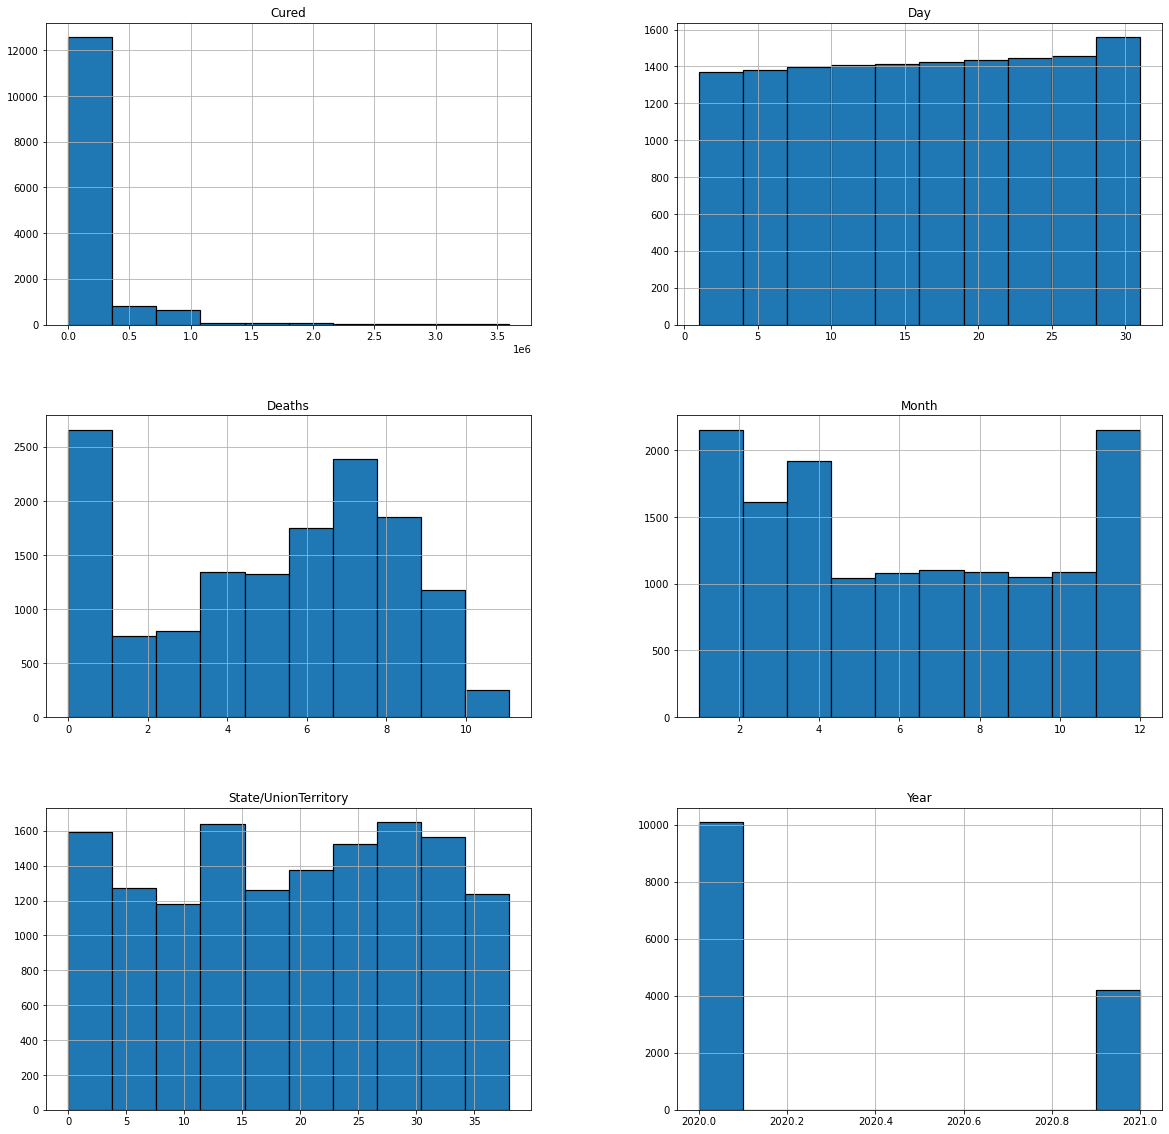

In [32]:
df.hist(edgecolor='Black', linewidth=1.2, figsize=(20,20))

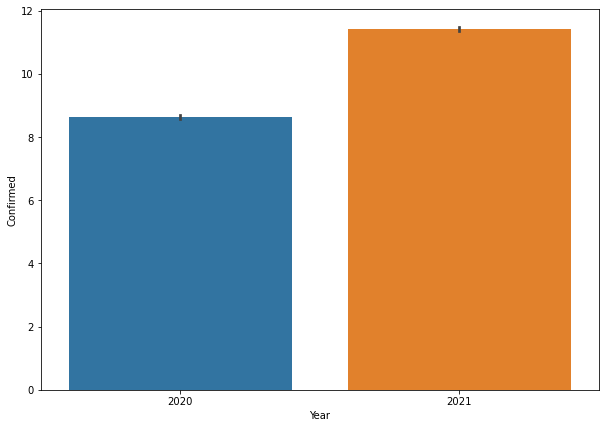

In [33]:
plt.figure(figsize=(10,7))
sns.barplot(x='Year', y=df_confirmed, data=df)

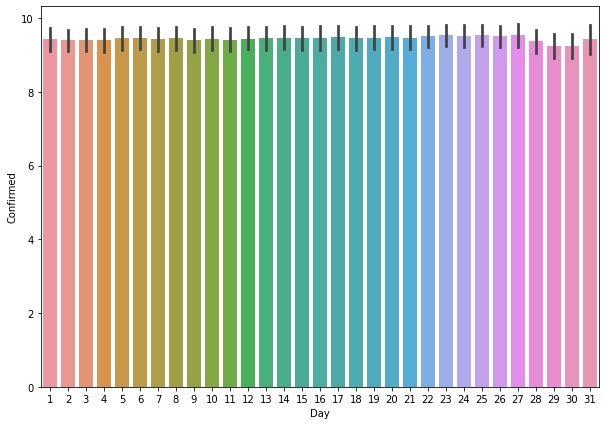

In [34]:
plt.figure(figsize=(10,7))
sns.barplot(x='Day', y=df_confirmed, data=df)

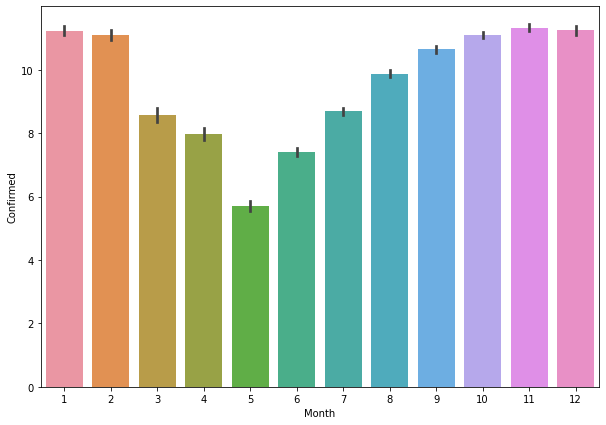

In [35]:
plt.figure(figsize=(10,7))
sns.barplot(x='Month', y=df_confirmed, data=df)

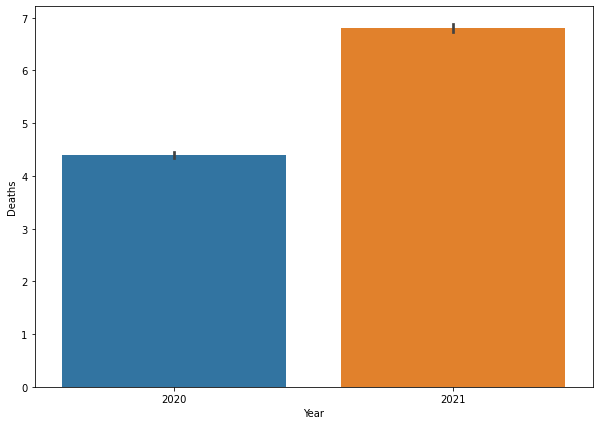

In [36]:
plt.figure(figsize=(10,7))
sns.barplot(x='Year', y='Deaths', data=df)

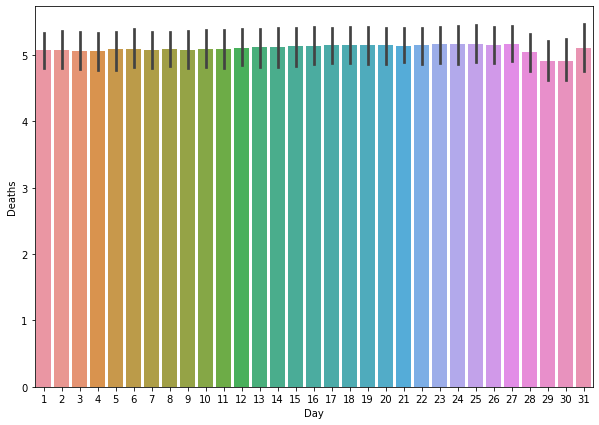

In [37]:
plt.figure(figsize=(10,7))
sns.barplot(x='Day', y='Deaths', data=df)

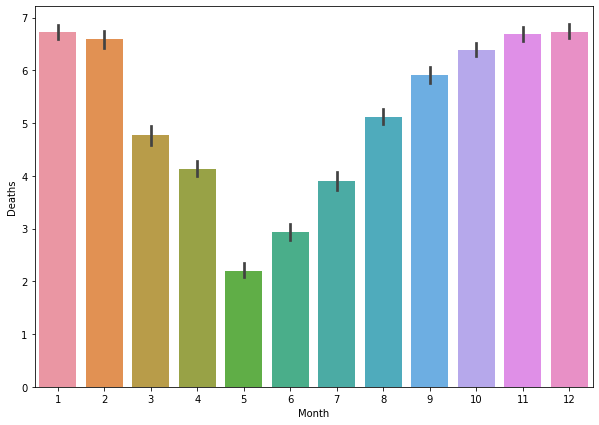

In [38]:
plt.figure(figsize=(10,7))
sns.barplot(x='Month', y='Deaths', data=df)

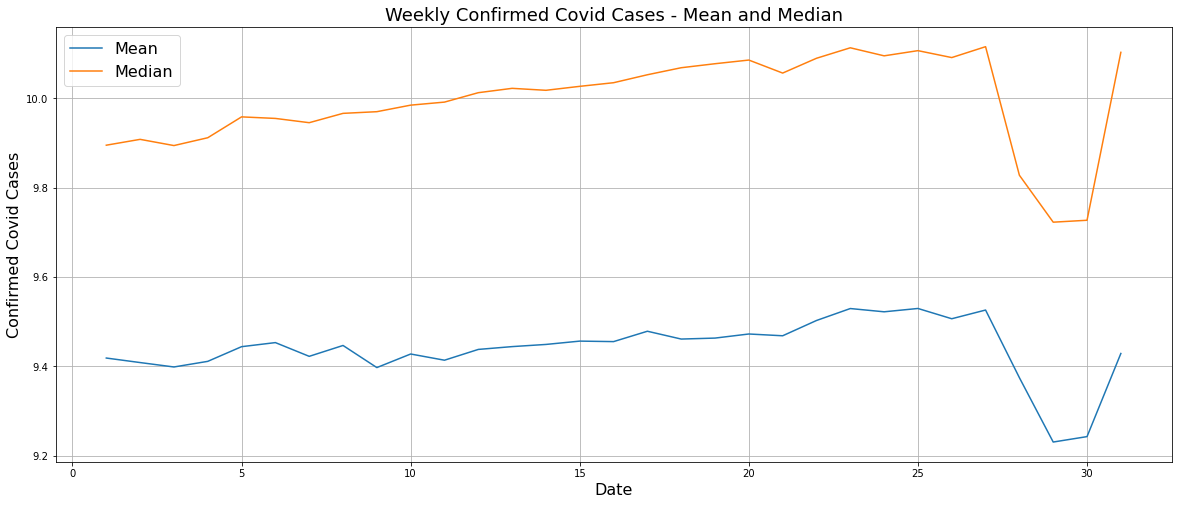

In [39]:
confirmed_mean = df_confirmed.groupby(df['Day']).mean()
confirmed_median = df_confirmed.groupby(df['Day']).median()
plt.figure(figsize=(20,8))
sns.lineplot(confirmed_mean.index, confirmed_mean.values)
sns.lineplot(confirmed_median.index, confirmed_median.values)
plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Weekly Confirmed Covid Cases - Mean and Median', fontsize=18)
plt.ylabel('Confirmed Covid Cases', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

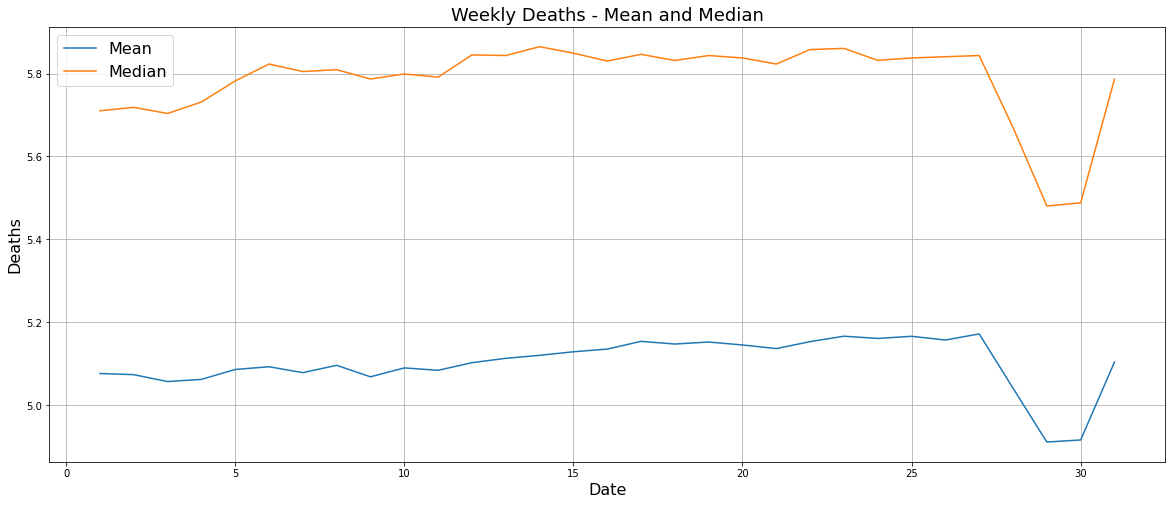

In [40]:
deaths_mean = df['Deaths'].groupby(df['Day']).mean()
deaths_median = df['Deaths'].groupby(df['Day']).median()
plt.figure(figsize=(20,8))
sns.lineplot(deaths_mean.index, deaths_mean.values)
sns.lineplot(deaths_median.index, deaths_median.values)
plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Weekly Deaths - Mean and Median', fontsize=18)
plt.ylabel('Deaths', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

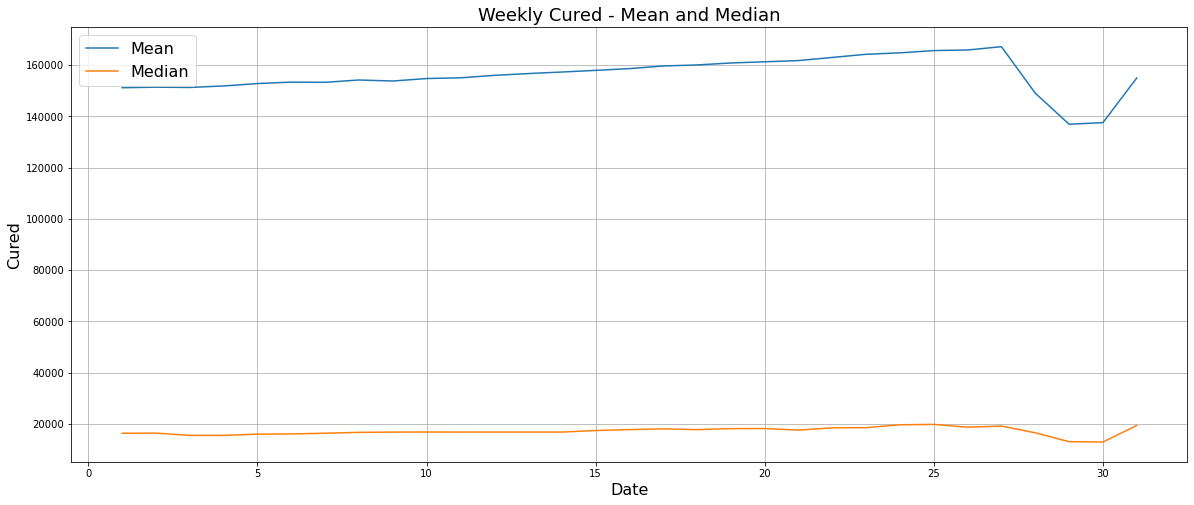

In [41]:
cured_mean = df['Cured'].groupby(df['Day']).mean()
cured_median = df['Cured'].groupby(df['Day']).median()
plt.figure(figsize=(20,8))
sns.lineplot(cured_mean.index, cured_mean.values)
sns.lineplot(cured_median.index, cured_median.values)
plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Weekly Cured - Mean and Median', fontsize=18)
plt.ylabel('Cured', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

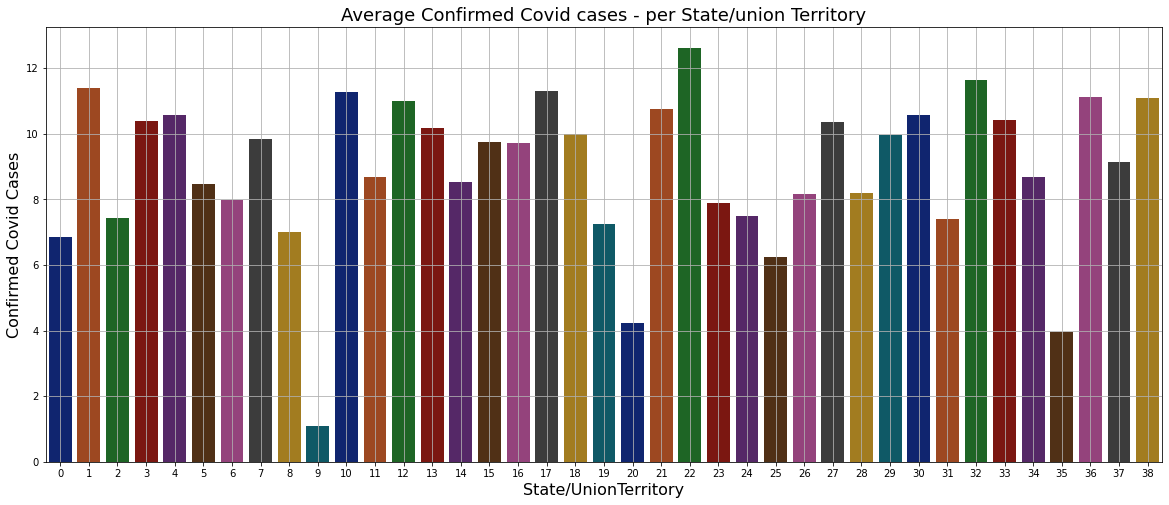

In [42]:
weekly_confirmed = df_confirmed.groupby(df['State/UnionTerritory']).mean()
plt.figure(figsize=(20,8))
sns.barplot(weekly_confirmed.index, weekly_confirmed.values, palette='dark')
plt.grid()
plt.title('Average Confirmed Covid cases - per State/union Territory', fontsize=18)
plt.ylabel('Confirmed Covid Cases', fontsize=16)
plt.xlabel('State/UnionTerritory', fontsize=16)
plt.show()

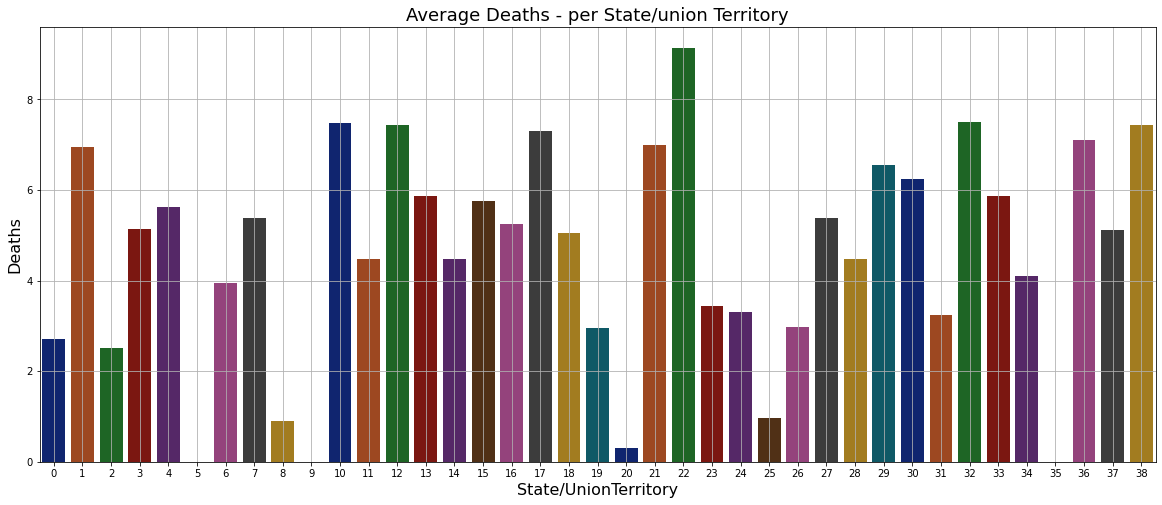

In [43]:
weekly_deaths = df['Deaths'].groupby(df['State/UnionTerritory']).mean()
plt.figure(figsize=(20,8))
sns.barplot(weekly_deaths.index, weekly_deaths.values, palette='dark')
plt.grid()
plt.title('Average Deaths - per State/union Territory', fontsize=18)
plt.ylabel('Deaths', fontsize=16)
plt.xlabel('State/UnionTerritory', fontsize=16)
plt.show()

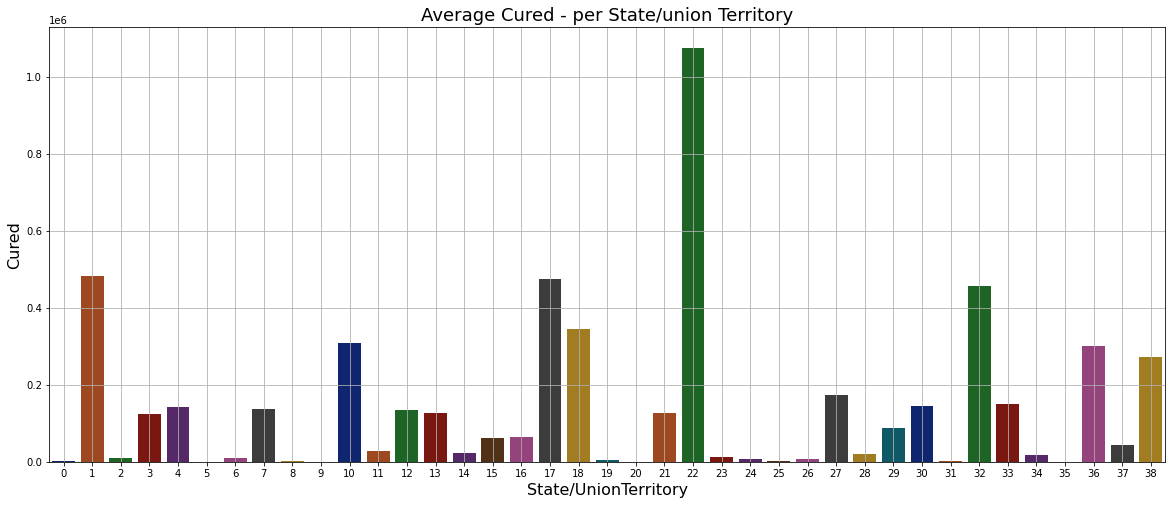

In [44]:
weekly_cure = df['Cured'].groupby(df['State/UnionTerritory']).mean()
plt.figure(figsize=(20,8))
sns.barplot(weekly_cure.index, weekly_cure.values, palette='dark')
plt.grid()
plt.title('Average Cured - per State/union Territory', fontsize=18)
plt.ylabel('Cured', fontsize=16)
plt.xlabel('State/UnionTerritory', fontsize=16)
plt.show()

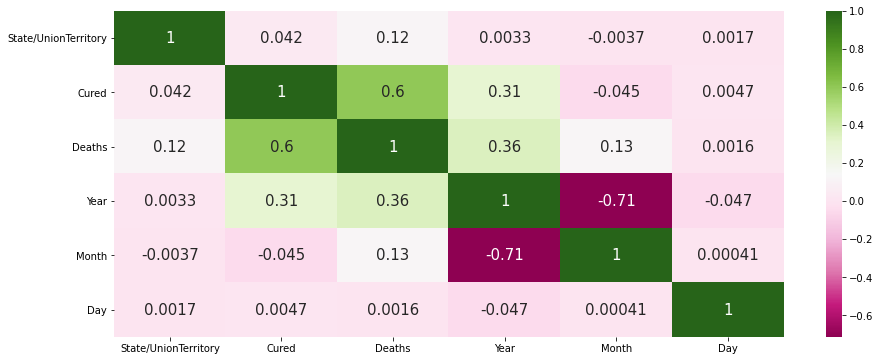

In [45]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(), annot=True, cmap="PiYG", annot_kws={"size":15})

In [46]:
x_train, x_test, y_train, y_test = train_test_split(df, df_confirmed, test_size=0.30, random_state=42)

In [47]:
x_train.shape

(10005, 6)

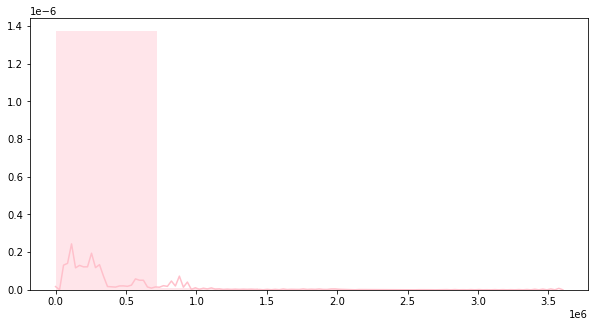

In [48]:
plt.figure(figsize=(10,5))
sns.distplot(x_train, bins=5, color='pink')

In [49]:
x_test.shape

(4289, 6)

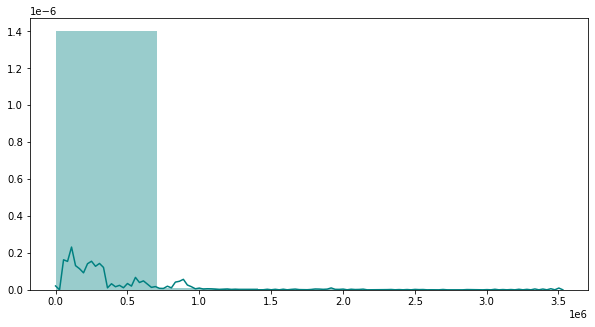

In [50]:
plt.figure(figsize=(10,5))
sns.distplot(x_test, bins=5, color='teal')

In [51]:
y_train.shape

(10005,)

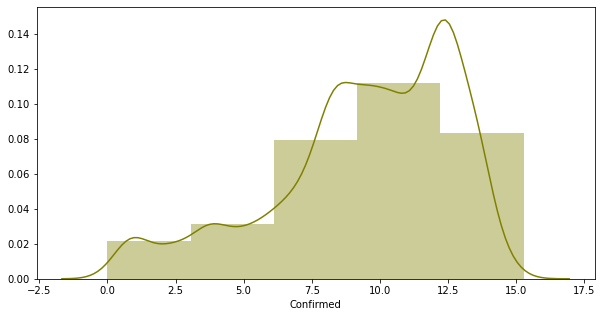

In [52]:
plt.figure(figsize=(10,5))
sns.distplot(y_train, bins=5, color='olive')

In [53]:
y_test.shape

(4289,)

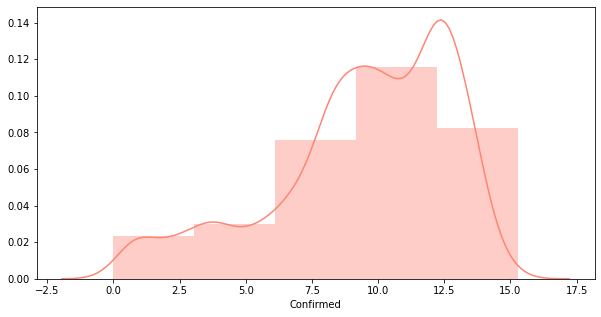

In [54]:
plt.figure(figsize=(10,5))
sns.distplot(y_test, bins=5, color='#ff8474')

In [55]:
clf_rf = RandomForestRegressor(n_estimators=150)
clf_rf.fit(x_train, y_train)
y_pred_rf=clf_rf.predict(x_test)
acc_rf= round(clf_rf.score(x_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 99 % 



In [56]:
rmse = np.sqrt(mean_squared_error(y_pred_rf, y_test))
rmse

0.18399048995724543

In [57]:
y_pred_rf

array([12.09492204, 12.64207739, 12.17156386, ..., 12.4453564 ,
        9.66216945,  8.25803629])

In [58]:
train_features, test_features, train_labels, test_labels = train_test_split(df, df_confirmed, test_size = 0.25, random_state = 42)

In [59]:
print('Train features shape:',train_features.shape)
print('Test features shape:',test_features.shape)
print('Train labels shape:',train_labels.shape)
print('Test labels shape:',test_labels.shape)

Train features shape: (10720, 6)
Test features shape: (3574, 6)
Train labels shape: (10720,)
Test labels shape: (3574,)


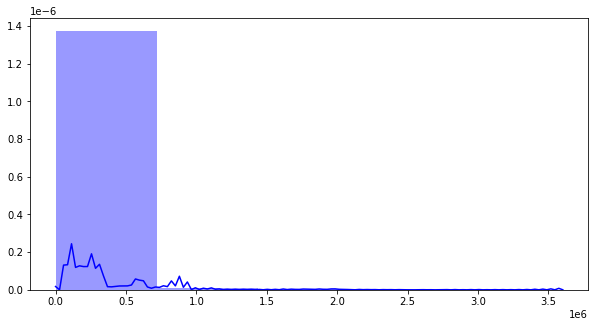

In [60]:
plt.figure(figsize=(10,5))
sns.distplot(train_features, hist=True, color='Blue', bins=5)

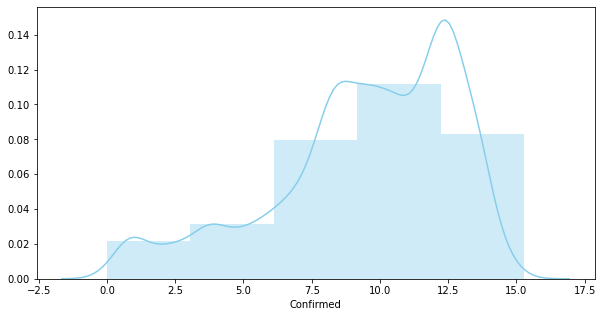

In [61]:
plt.figure(figsize=(10,5))
sns.distplot(train_labels, hist=True, color='SkyBlue', bins=5)

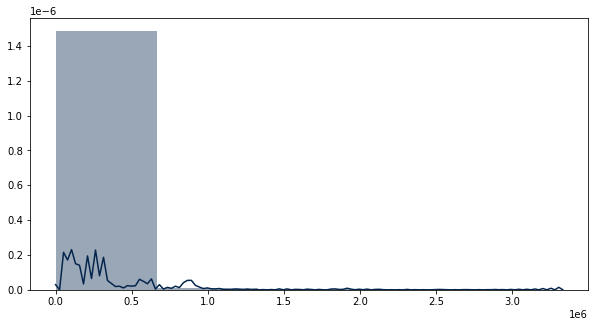

In [62]:
plt.figure(figsize=(10,5))
sns.distplot(test_features, hist=True, color='#03254c', bins=5)

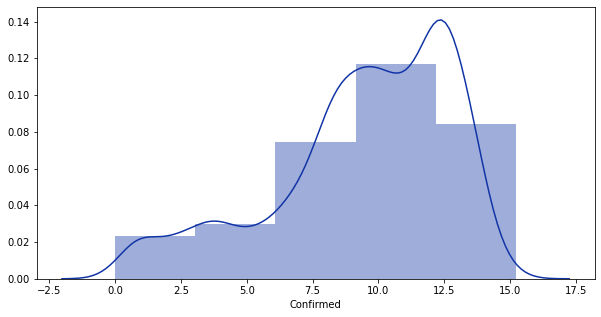

In [63]:
plt.figure(figsize=(10,5))
sns.distplot(test_labels, hist=True, color='#1034a6', bins=5)

In [64]:
randfor=RandomForestRegressor(n_estimators=1000, random_state=42)
randfor

RandomForestRegressor(n_estimators=1000, random_state=42)

In [65]:
fit_mod=randfor.fit(train_features,train_labels)

In [66]:
acc_rf= round(fit_mod.score(train_features, train_labels) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 99 % 



In [67]:
pred=randfor.predict(test_features)

In [68]:
pred

array([12.09662604, 12.64139152, 12.16946728, ...,  9.73304089,
        2.75536732, 13.74782611])

In [69]:
err= abs(pred-test_labels)

In [70]:
err

11981    0.004506
7234     0.000805
7054     0.020478
12534    0.001963
12319    0.008083
           ...   
4075     0.030685
12902    0.003625
13612    0.000488
2088     0.116310
13784    0.005964
Name: Confirmed, Length: 3574, dtype: float64

In [71]:
print('Mean Absolute Error:', round(np.mean(err), 2), 'degrees.')

Mean Absolute Error: 0.06 degrees.


In [72]:
mape = 100 * (err / test_labels)
mape

11981    0.037266
7234     0.006366
7054     0.168560
12534    0.015728
12319    0.080851
           ...   
4075     0.313240
12902    0.032927
13612    0.005017
2088     4.407255
13784    0.043365
Name: Confirmed, Length: 3574, dtype: float64

In [73]:
test_features

,State/UnionTerritory,Cured,Deaths,Year,Month,Day
11981,29,169686,8.657824,2021,2,22
7234,10,281869,8.660427,2020,10,12
7054,3,155077,6.658011,2020,10,7
12534,4,260975,7.344719,2021,3,10
12319,6,21104,5.874931,2021,3,4
...,...,...,...,...,...,...
4075,4,12317,5.081404,2020,7,14
12902,14,58249,6.924612,2021,3,20
13612,2,16788,4.043051,2021,4,9
2088,24,11,0.693147,2020,5,19


In [75]:
predict=pd.DataFrame(pred)

In [76]:
predict

,0
0,12.096626
1,12.641392
2,12.169467
3,12.477266
4,10.005197
...,...
3569,9.826587
3570,11.012204
3571,9.733041
3572,2.755367


In [84]:
Data=test_features

In [85]:
Data['Confirmed Case Predictions']=predict.values

In [80]:
Data

,State/UnionTerritory,Cured,Deaths,Year,Month,Day,Confirmed Case Predictions
11981,29,169686,8.657824,2021,2,22,12.096626
7234,10,281869,8.660427,2020,10,12,12.641392
7054,3,155077,6.658011,2020,10,7,12.169467
12534,4,260975,7.344719,2021,3,10,12.477266
12319,6,21104,5.874931,2021,3,4,10.005197
...,...,...,...,...,...,...,...
4075,4,12317,5.081404,2020,7,14,9.826587
12902,14,58249,6.924612,2021,3,20,11.012204
13612,2,16788,4.043051,2021,4,9,9.733041
2088,24,11,0.693147,2020,5,19,2.755367


In [81]:
Data.to_excel('covidpred_result.xlsx')